# AIDM 7410 Computational Journalism
## Group Project
### Topic: 
#### Galaxy of Directors and Actors: The gorgeousness, fade and reconstruction of HK movies’ past 10 years

***
* Group name:   Node <br/>

* Group members:<br/>
WANG Qilong, 20452454<br/>
***

**Topic and issue <br/>**

The project aims to dig out the hidden factors and networks in the Hong Kong film industry by analysing the data of the Hong Kong Film Awards in the past 10 years..

**Dataset <br/>**

The dataset is created based on the 31st-39th data from HK Film Awards.

The link of the raw data: <br/>
* Hong Kong Film Awards' Movie Information: http://www.hkfaa.com/movielist.html

**Methods <br/>**
* Data Analysis - Python <br/>
* Network Visualization & Evaluation - Gephi <br/>

In [1]:
import sys
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install xlrd==1.2.0

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [4]:
#imput the raw dataset of 
df = pd.read_excel('/Users/wangqilong/Documents/Programming/AIDM7410/GroupProject/Director_Actor.xlsx', engine='openpyxl', encoding = 'gb18030') 

In [5]:
df.head(20)

,Awards-winning films,Directors,Actors
0,《少年的你》,曾國祥,易烊千璽
1,NaN,NaN,周冬雨
2,NaN,NaN,尹昉
3,NaN,NaN,黃覺
4,NaN,NaN,吳越
5,NaN,NaN,周也
6,《叔．叔》,楊曜愷,太保
7,NaN,NaN,袁富華
8,NaN,NaN,盧鎮業
9,NaN,NaN,江圖


In [6]:
#Reset Index and Sum of the counts of each film
df_movies_count = df['Awards-winning films'].value_counts().reset_index()
df_movies_count.columns = ['Awards-winning films', 'number of films']
print(df_movies_count)

   Awards-winning films  number of films
0                《相愛相親》                1
1                 《葉問3》                1
2                《讓子彈飛》                1
3               《出軌的女人》                1
4                 《悟空傳》                1
..                  ...              ...
65                《奪命金》                1
66               《黃金時代》                1
67              《西遊伏妖篇》                1
68                 《激戰》                1
69              《竊聽風雲3》                1

[70 rows x 2 columns]


In [7]:
#Reset Index and Sum of the counts of each director
df_directors_count = df['Directors'].value_counts().reset_index()
df_directors_count.columns = ['Directors', 'number_of_movies']
print(df_directors_count)

   Directors  number_of_movies
0        林超賢                 3
1        許鞍華                 3
2        彭浩翔                 3
3        葉偉信                 3
4         徐克                 3
5        莊文強                 3
6         王晶                 2
7        邱禮濤                 2
8        曾國祥                 2
9        麥兆輝                 2
10       陳可辛                 2
11       歐文傑                 2
12       梁樂民                 2
13        陳果                 2
14       杜琪峯                 2
15       周顯揚                 2
16       鄭保瑞                 2
17       黃修平                 2
18        黃進                 1
19       曾翠珊                 1
20       黃綺琳                 1
21       黃慶勳                 1
22       爾冬陞                 1
23       郭子健                 1
24       陳志發                 1
25       潘源良                 1
26       張艾嘉                 1
27       伍嘉良                 1
28       馮志強                 1
29        郭臻                 1
30        成龍                 1
31      

In [8]:
#Reset Index and Sum of the counts of each actor
df_actors_count = df['Actors'].value_counts().reset_index()
df_actors_count.columns = ['Actors', 'number_of_movies']
print(df_actors_count)

    Actors  number_of_movies
0      姜皓文                11
1      彭于晏                 9
2      郭富城                 8
3      甄子丹                 8
4      劉德華                 8
..     ...               ...
350    吳浩康                 1
351   倉田保昭                 1
352    陳漢娜                 1
353    張靜初                 1
354    小瀋陽                 1

[355 rows x 2 columns]


In [9]:
#Save the two new datasets about the directors and actors
df_directors_count.to_csv('./df_directors_count.csv',index=False)
df_actors_count.to_csv('./df_actors_count.csv',index=False)

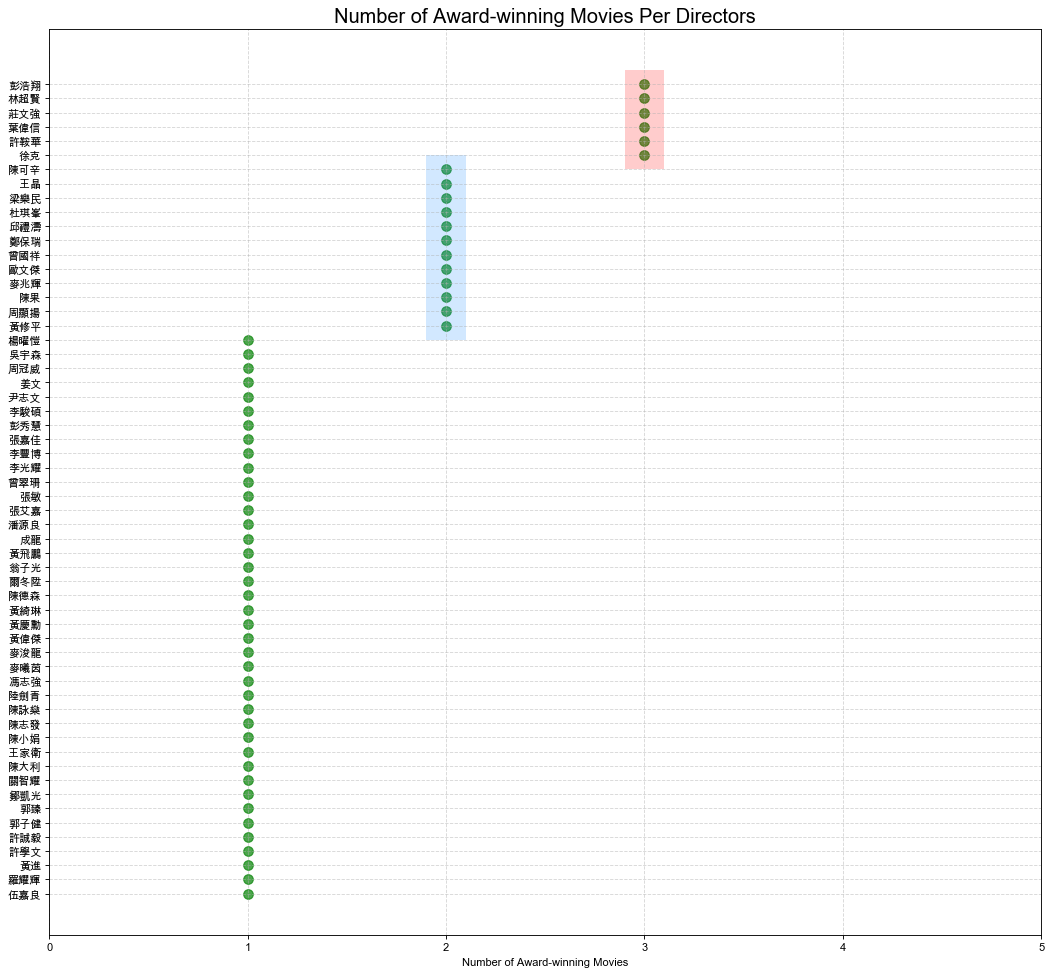

In [10]:
#Visualization: the Number of Award-winning Movies Per Directors

# Prepare Data
df1 = df_directors_count[['number_of_movies', 'Directors']].groupby('Directors').apply(lambda x: x.mean())
df1.sort_values('number_of_movies', inplace=True)
df1.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,15), dpi= 80)
ax.hlines(y=df1.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df1.index, x=df1.number_of_movies, s=75, color='green', alpha=0.7)

# Add Patches
import matplotlib.patches as patches
p1 = patches.Rectangle((1.9, 39), width=.2, height=13, alpha=.2, facecolor='dodgerblue')
p2 = patches.Rectangle((2.9, 51), width=.2, height=7, alpha=.2, facecolor='red')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Title, Label, Ticks and Ylim
ax.set_title('Number of Award-winning Movies Per Directors', fontdict={'size':18})
ax.set_xlabel('Number of Award-winning Movies')
ax.set_yticks(df1.index)
ax.set_yticklabels(df1.Directors.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(0, 5)
plt.grid(linestyle='--', alpha=0.5)
plt.savefig('Number of Award-winning Movies Per Directors.png')
plt.savefig('Number of Award-winning Movies Per Directors.pdf')
plt.show()

In [11]:
#imput the dataset of the directors
df_director = pd.read_excel('/Users/wangqilong/Documents/Programming/AIDM7410/GroupProject/directors.xlsx', engine='openpyxl', encoding = 'gb18030') 

In [12]:
#check
df_director.head()

,Directors,generation,number_of_movies
0,林超賢,1960s,3
1,許鞍華,1940s,3
2,徐克,1950s,3
3,彭浩翔,1970s,3
4,莊文強,1960s,3


In [13]:
#the counts of the different generations of the directors
df_director.generation.value_counts()

1970s    15
1960s    12
1980s    12
1950s    10
1940s     2
1990s     1
Name: generation, dtype: int64

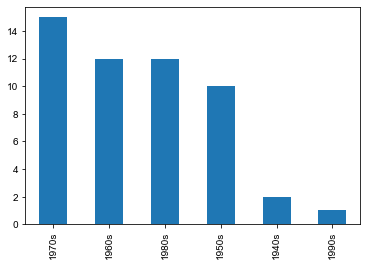

In [14]:
#check
df_director.generation.value_counts().plot(kind='bar')
plt.show()

In [15]:
#imput the dataset of the actors
df_actors = pd.read_excel('/Users/wangqilong/Documents/Programming/AIDM7410/GroupProject/actors_top30.xlsx', engine='openpyxl', encoding = 'gb18030') 

In [16]:
#check
df_actors.head()

,Actors,generation,number_of_movies
0,姜皓文,1960s,11
1,彭于晏,1980s,9
2,劉德華,1960s,8
3,甄子丹,1960s,8
4,郭富城,1960s,8


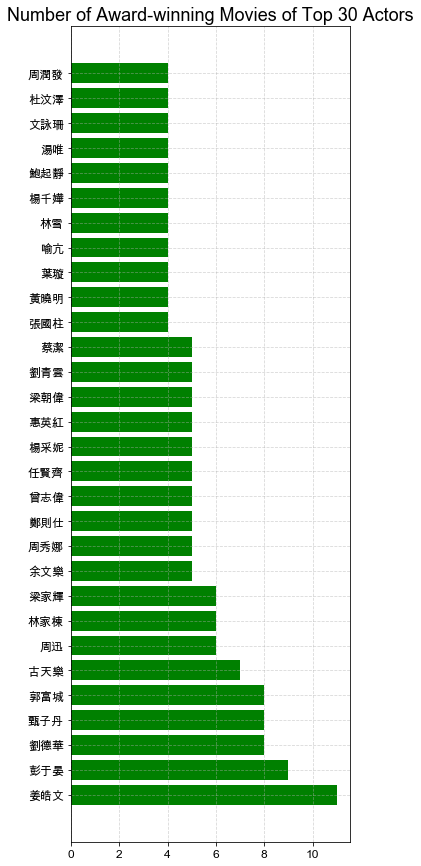

In [17]:
#Visualization: Number of Award-winning Movies of Top 30 Actors

fig = plt.figure(figsize=(5,15))  
#plt.tick_params(axis='x',labelsize=10) 
fontsize = 9
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# Vertical Lines
# ax.vlines(x=1, ymin=0, ymax=400, color='black', alpha=1, linewidth=1, linestyles='dotted')
# ax.vlines(x=3, ymin=0, ymax=400, color='black', alpha=1, linewidth=1, linestyles='dotted')
# ax.vlines(x=5, ymin=0, ymax=400, color='black', alpha=1, linewidth=1, linestyles='dotted')
# ax.vlines(x=7, ymin=0, ymax=400, color='black', alpha=1, linewidth=1, linestyles='dotted')

plt.title('Number of Award-winning Movies of Top 30 Actors',fontsize=18)

plt.grid(linestyle='--', alpha=0.5)
plt.barh(df_actors['Actors'], df_actors['number_of_movies'], color="green")
plt.savefig('Number of Award-winning Movies of Top 30 Actors.png', bbox_inches='tight')

In [18]:
#the counts of the different generations of the Top 30 actors
df_actors.generation.value_counts()

1960s    10
1970s     7
1980s     6
1950s     4
1940s     2
Name: generation, dtype: int64